In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import cv2
import matplotlib.pyplot as plt


In [4]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/img/bird.jpg')

In [5]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

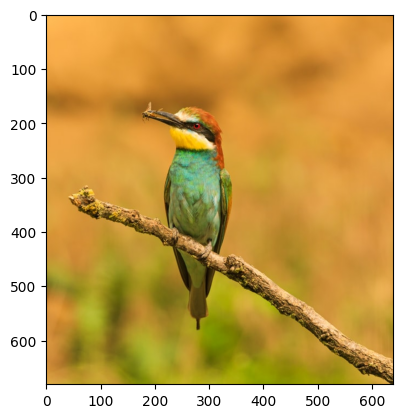

In [6]:
plt.imshow(rgb_image)

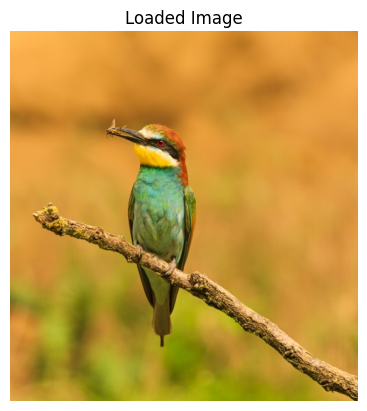

In [7]:
plt.imshow(rgb_image)
plt.title("Loaded Image")
plt.axis("off")
plt.show()

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

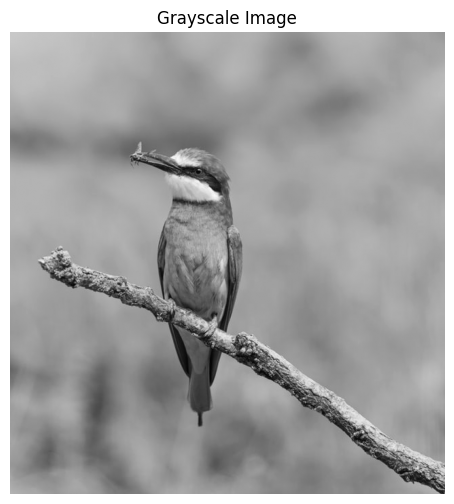

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [10]:
resized_image = cv2.resize(rgb_image, (300, 200), interpolation = cv2.INTER_LINEAR)


In [11]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

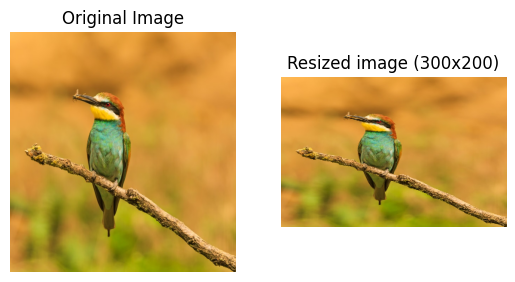

In [12]:
# Original Image

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized image (300x200)')
plt.axis('off')
plt.show()

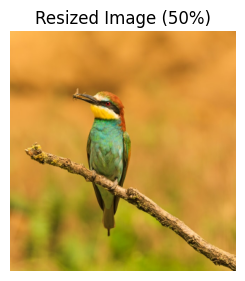

In [13]:
scale_x = 0.5
scale_y = 0.5
resized_image = cv2.resize(rgb_image, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_LINEAR)
plt.subplot(1, 2, 1)
plt.imshow(resized_image)
plt.title("Resized Image (50%)")
plt.axis("off")
plt.show()

In [14]:

height, width, channels = image.shape
print(f'Height" {height}, width: {width}, channels: {channels}')

Height" 681, width: 640, channels: 3


In [15]:
height, width, channels = rgb_image.shape
print(f'Height" {height}, width: {width}, channels: {channels}')

Height" 681, width: 640, channels: 3


In [16]:
height, width = gray_image.shape
print(f'Height" {height}, width: {width}')

Height" 681, width: 640


In [17]:
height, width, channels = resized_image.shape
print(f'Height" {height}, width: {width}, channels: {channels}')

Height" 340, width: 320, channels: 3


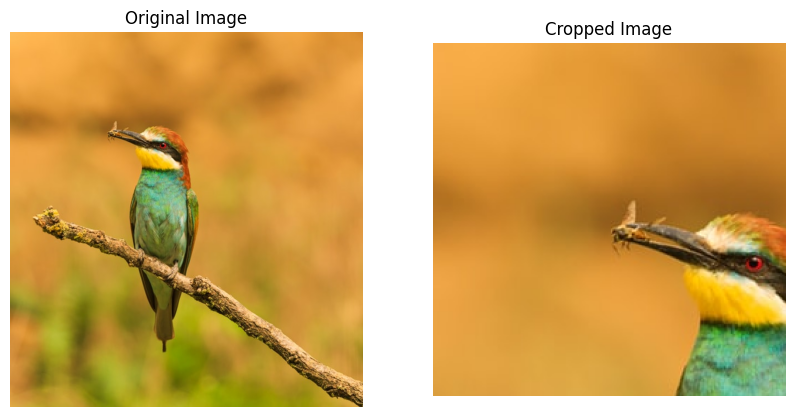

In [18]:
x1, x2 = 50, 300   # width
y1, y2 = 50, 300 # height
cropped_image = rgb_image[y1: y2, x1: x2]
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()


Image center  (160, 170)


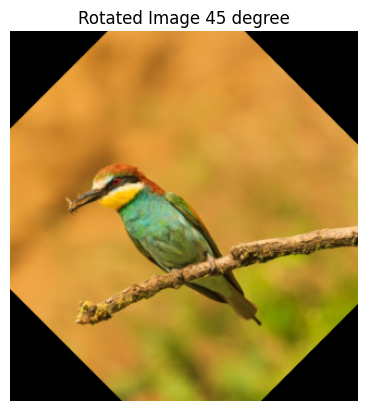

In [19]:
(h, w) = resized_image.shape[:2]

center = (w//2, h//2)
print('Image center ', center)

angle = 45

rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(resized_image, rotation_matrix, (w, h))

plt.imshow(rotated_image)
plt.title('Rotated Image 45 degree')
plt.axis('off')
plt.show()


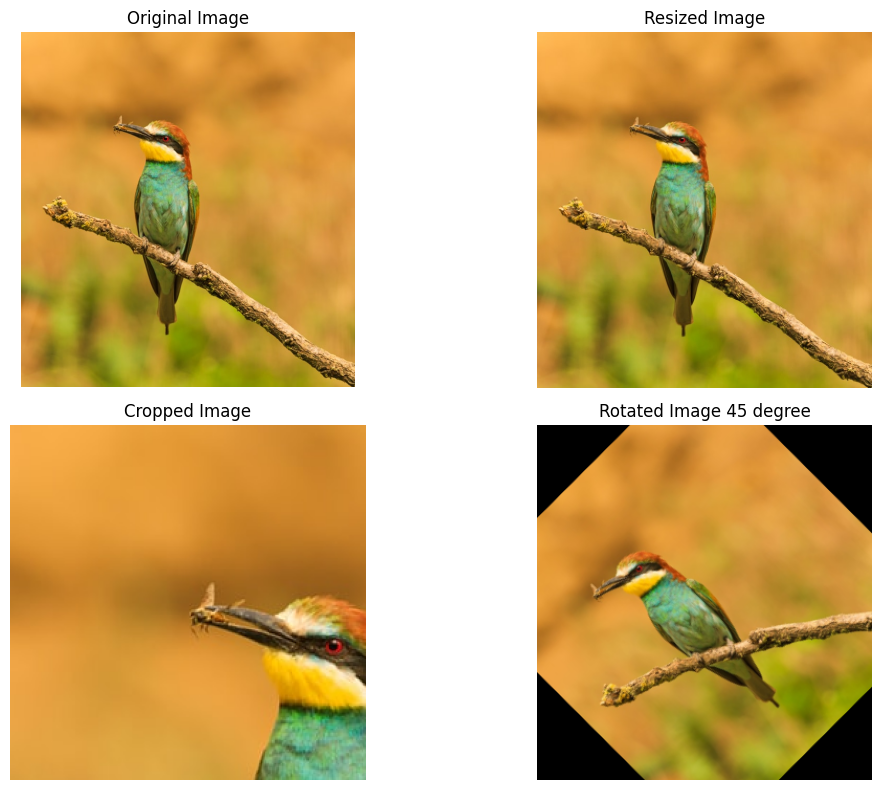

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(rotated_image)
plt.title('Rotated Image 45 degree')
plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is in

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
print(tf.__version__)

2.20.0


In [23]:
def load_and_process_image(image_path):
    img = load_img(image_path, target_size=(400, 400))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(image):
    image = image.reshape((400, 400, 3))
    image[:, :, 0] += 103.939
    image[:, :, 1] += 116.779
    image[:, :, 2] += 123.68
    image = np.clip(image, 0, 255).astype("uint8")
    return image


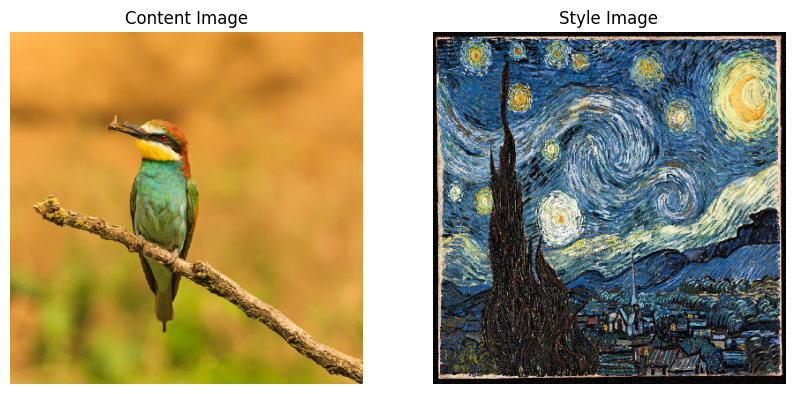

In [24]:
content_path = "/content/drive/MyDrive/Colab Notebooks/img/bird.jpg"
style_path = "/content/drive/MyDrive/Colab Notebooks/img/vincent_starry.jpg"

content_image = load_and_process_image(content_path)
style_image = load_and_process_image(style_path)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(load_img(content_path, target_size=(400, 400)))
plt.title("Content Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(load_img(style_path, target_size=(400, 400)))
plt.title("Style Image")
plt.axis("off")

plt.show()


In [25]:
# Load VGG19 model (pre-trained on ImageNet dataset)
def get_vgg_model():
    model = vgg19.VGG19(weights="imagenet", include_top=False)
    # Freeze layers
    model.trainable = False
    return model

vgg = get_vgg_model()
vgg.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [26]:
# Define layer names for feature extraction
content_layer = "block5_conv2"  # Content representation
style_layers = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]

def get_feature_extractor(model, layer_names):
    outputs = [model.get_layer(name).output for name in layer_names]
    return tf.keras.Model([model.input], outputs)

feature_extractor = get_feature_extractor(vgg, [content_layer] + style_layers)

# Extract content[0] & style features[1:]
content_features = feature_extractor(content_image)[0]
style_features = feature_extractor(style_image)[1:]

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 400, 400, 3))
  warnings.warn(msg)


In [27]:
def compute_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

def gram_matrix(tensor):
    channels = int(tensor.shape[-1])
    matrix = tf.reshape(tensor, [-1, channels])
    n = tf.shape(matrix)[0]
    gram = tf.matmul(matrix, matrix, transpose_a=True) / tf.cast(n, tf.float32)
    return gram

def compute_style_loss(style, generated):
    S = gram_matrix(style)
    G = gram_matrix(generated)
    return tf.reduce_mean(tf.square(S - G))


Iteration 0, Total Loss: 3331132160.0
Iteration 10, Total Loss: 533145536.0
Iteration 20, Total Loss: 217634992.0
Iteration 30, Total Loss: 128193816.0
Iteration 40, Total Loss: 91828368.0
Iteration 50, Total Loss: 73157704.0
Iteration 60, Total Loss: 62065888.0
Iteration 70, Total Loss: 54798960.0
Iteration 80, Total Loss: 49626352.0
Iteration 90, Total Loss: 45733184.0


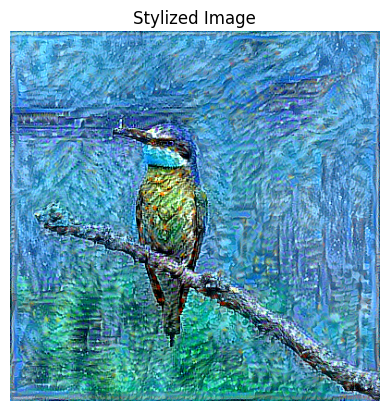

In [28]:
# Define the generated image
generated_image = tf.Variable(content_image, dtype=tf.float32)

# Hyperparameters
epochs = 100  # You can reduce for faster results
content_weight = 1e4
style_weight = 1e-2
optimizer = tf.keras.optimizers.Adam(learning_rate=5.0)

# Training Loop
for i in range(epochs):
    with tf.GradientTape() as tape:
        generated_features = feature_extractor(generated_image)
        content_loss = compute_content_loss(generated_features[0], content_features)
        style_loss = tf.add_n([compute_style_loss(g, s) for g, s in zip(generated_features[1:], style_features)])
        total_loss = content_weight * content_loss + style_weight * style_loss

    # Compute gradients
    grads = tape.gradient(total_loss, generated_image)
    optimizer.apply_gradients([(grads, generated_image)])

    if i % 10 == 0:
        print(f"Iteration {i}, Total Loss: {total_loss.numpy()}")

# Convert the final stylized image
final_image = deprocess_image(generated_image.numpy())
plt.imshow(final_image)
plt.title("Stylized Image")
plt.axis("off")
plt.show()


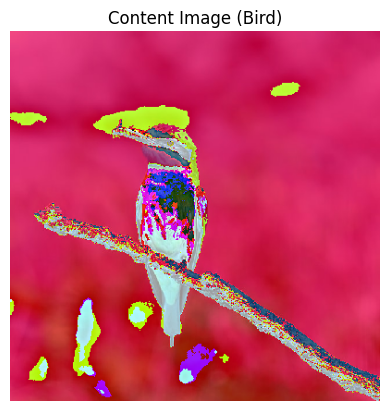

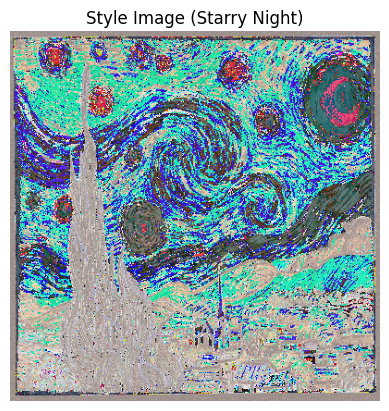

In [29]:
content_path = "/content/drive/MyDrive/Colab Notebooks/img/bird.jpg"
style_path = "/content/drive/MyDrive/Colab Notebooks/img/vincent_starry.jpg"

# Function to load and preprocess an image
def load_and_process_image(image_path):
    img = load_img(image_path, target_size=(400, 400))  # Resize to speed up training
    img = img_to_array(img)  # Convert to NumPy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.keras.applications.vgg19.preprocess_input(img)  # Normalize for VGG19
    return tf.convert_to_tensor(img, dtype=tf.float32)

# Load images
content_image = load_and_process_image(content_path)  # Load content image
style_image = load_and_process_image(style_path)  # Load style image

# Function to display images
def show_image(image, title="Image"):
    img = np.squeeze(image.numpy())  # Remove batch dimension
    img = img.astype("uint8")  # Convert to display format
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Show images to confirm they are loaded correctly
show_image(content_image, "Content Image (Bird)")
show_image(style_image, "Style Image (Starry Night)")

In [30]:
# Load VGG19 model (pre-trained on ImageNet)
vgg = tf.keras.applications.VGG19(include_top=False, weights="imagenet")

# Extract intermediate layer outputs for style and content
content_layer = "block4_conv2"  # Layer to extract content features
style_layers = [
    "block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1"
]  # Style layers

# Function to create a feature extractor model
def build_feature_extractor():
    model_outputs = [vgg.get_layer(name).output for name in [content_layer] + style_layers]
    return tf.keras.Model([vgg.input], model_outputs)

# Extract features
feature_extractor = build_feature_extractor()

# Get content and style features
content_features = feature_extractor(content_image)
style_features = feature_extractor(style_image)


In [31]:
# Compute content loss
def compute_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

# Compute style loss (Gram Matrix method)
def gram_matrix(tensor):
    channels = int(tensor.shape[-1])
    vectorized = tf.reshape(tensor, [-1, channels])
    gram = tf.matmul(tf.transpose(vectorized), vectorized)
    return gram / tf.cast(tf.size(vectorized), tf.float32)

# Compute style loss
def compute_style_loss(generated, style):
    return tf.reduce_mean(tf.square(gram_matrix(generated) - gram_matrix(style)))


Iteration 0, Total Loss: 14053.404296875
Saved checkpoint at /content/stylized_image_epoch_0.jpg
Iteration 10, Total Loss: 205669248.0
Iteration 20, Total Loss: 75715720.0
Iteration 30, Total Loss: 21107160.0
Iteration 40, Total Loss: 7497805.0
Iteration 50, Total Loss: 3293082.25
Saved checkpoint at /content/stylized_image_epoch_50.jpg
Iteration 60, Total Loss: 1662229.875
Iteration 70, Total Loss: 963532.9375
Iteration 80, Total Loss: 726950.6875
Iteration 90, Total Loss: 549631.1875
Iteration 100, Total Loss: 510801.75
Saved checkpoint at /content/stylized_image_epoch_100.jpg
Iteration 110, Total Loss: 368010.90625
Iteration 120, Total Loss: 344432.5
Iteration 130, Total Loss: 425954.3125
Iteration 140, Total Loss: 307887.75
Iteration 150, Total Loss: 653518.625
Saved checkpoint at /content/stylized_image_epoch_150.jpg
Iteration 160, Total Loss: 6302961.0
Iteration 170, Total Loss: 5185695.0
Iteration 180, Total Loss: 15167520.0
Iteration 190, Total Loss: 18648482.0
Iteration 200, T

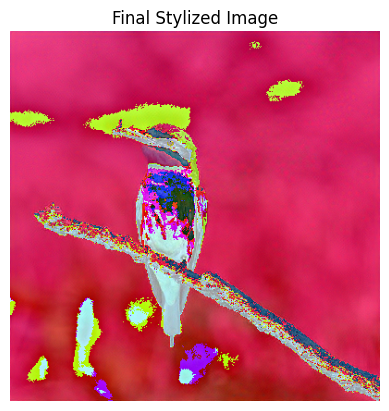

In [32]:
# Initialize generated image
generated_image = tf.Variable(content_image.numpy(), dtype=tf.float32)

# Hyperparameters
epochs = 300  # Training iterations
content_weight = 1e4
style_weight = 1e-2
optimizer = tf.keras.optimizers.Adam(learning_rate=2.0)

# Function to save intermediate images
def save_image(img, path):
    img = np.squeeze(img.numpy())  # Remove batch dimension
    img = np.clip(img, 0, 255).astype("uint8")  # Normalize for display
    plt.imsave(path, img)

# Training loop
for i in range(epochs):
    with tf.GradientTape() as tape:
        generated_features = feature_extractor(generated_image)
        content_loss = compute_content_loss(generated_features[0], content_features[0])
        style_loss = tf.add_n([compute_style_loss(g, s) for g, s in zip(generated_features[1:], style_features[1:])])
        total_loss = content_weight * content_loss + style_weight * style_loss

    # Compute gradients
    grads = tape.gradient(total_loss, generated_image)
    optimizer.apply_gradients([(grads, generated_image)])

    if i % 10 == 0:
        print(f"Iteration {i}, Total Loss: {total_loss.numpy()}")

    if i % 50 == 0:  # Save progress every 50 epochs
        save_path = f"/content/stylized_image_epoch_{i}.jpg"
        save_image(generated_image, save_path)
        print(f"Saved checkpoint at {save_path}")

# Convert and display final stylized image
final_image = np.squeeze(generated_image.numpy())  # Remove batch dimension
plt.imshow(final_image.astype("uint8"))
plt.title("Final Stylized Image")
plt.axis("off")
plt.show()
